# <font color='#FFE15D'>**Week 18: Clustering 🍇**</font>

## **🔸 Imports**

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification, make_blobs
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import *

from mlxtend.plotting import plot_decision_regions

## **🔸 Datasets**

### Example 1

In [55]:
X = pd.read_csv('data/Mall_Customers.csv')
X.columns = ['customer_id', 'gender', 'age', 'annual_income', 'spending_score']
X = X.drop('customer_id', axis=1)
X['gender'] = X['gender'].map({'Male': 0, 'Female': 1})
display(X.head())


X_train, X_test = train_test_split(X, test_size=0.2, random_state=0)

# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

X_train = X_train.values
X_test = X_test.values

X_train.shape, X_test.shape

,gender,age,annual_income,spending_score
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40


((160, 4), (40, 4))

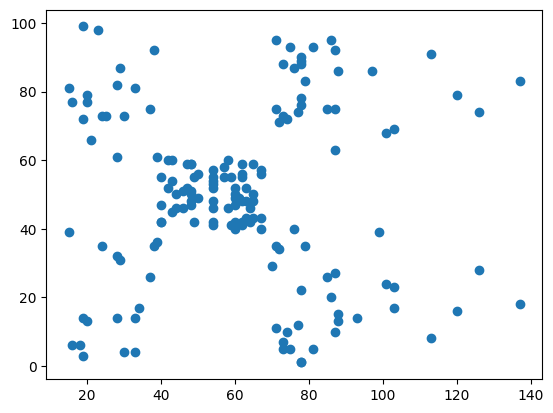

In [56]:
plt.scatter(X_train[:, -2], X_train[:, -1])

### Example 2

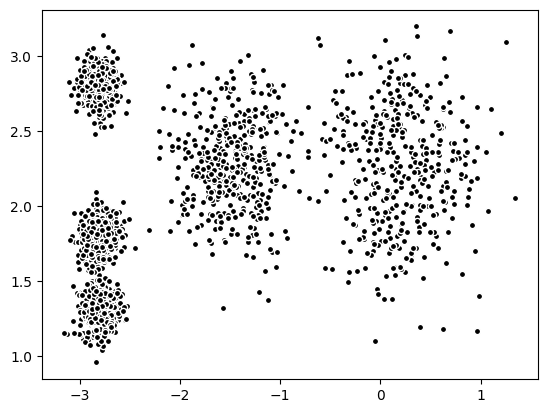

In [57]:
blob_centers = np.array([[ 0.2,  2.3],
                         [-1.5,  2.3],
                         [-2.8,  1.8],
                         [-2.8,  2.8],
                         [-2.8,  1.3]])

blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

X2, y2 = make_blobs(n_samples=2000, centers=blob_centers,
                  cluster_std=blob_std, random_state=7)

plt.scatter(X2[:, 0], X2[:, 1], s=20, c='black', edgecolor='white')

### Example 3

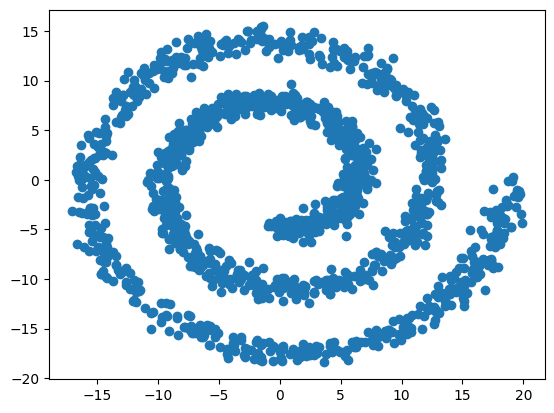

In [59]:
n_samples = 1500
np.random.seed(0)

t = 1.5 * np.pi * (1 + 3 * np.random.rand(1, n_samples))
x = t * np.cos(t)
y = t * np.sin(t)

X3 = np.concatenate((x, y))
X3 += 0.7 * np.random.randn(2, n_samples)
X3 = X3.T

plt.scatter(X3[:, 0], X3[:, 1])

### Example 4

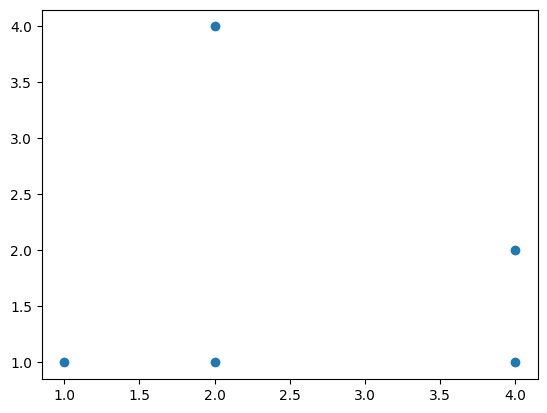

In [60]:
X4 = np.array([[1, 1], [2, 4], [2, 1], [4, 1], [4, 2]])

plt.scatter(X4[:, 0], X4[:, 1])

## **🔸 K-means**

### from scratch

In [51]:
class KMeansScratch:
    
    def __init__(self, n_clusters, max_iters=100, random_state=None):
        self.n_clusters = n_clusters
        self.max_iters = max_iters
        self.random_state = random_state

    def fit(self, X):
        if self.random_state:
            # print(self.random_state)
            np.random.seed(self.random_state)
            
        centers = X[np.random.choice(len(X), size=self.n_clusters, replace=False)]
        
        for _ in range(self.max_iters):
            distances = np.linalg.norm(X[:, None, :]-centers, axis=2)
            labels = np.argmin(distances, axis=1)
        
            new_centers = np.array([X[labels == c].mean(axis=0) for c in range(self.n_clusters)])
            
            if np.all(new_centers == centers):
                print(_)
                break
                
            centers = new_centers.copy()
            
        return labels, centers
            

In [52]:
kmeans = KMeansScratch(n_clusters=5, random_state=42)
labels, centers = kmeans.fit(X2)

5


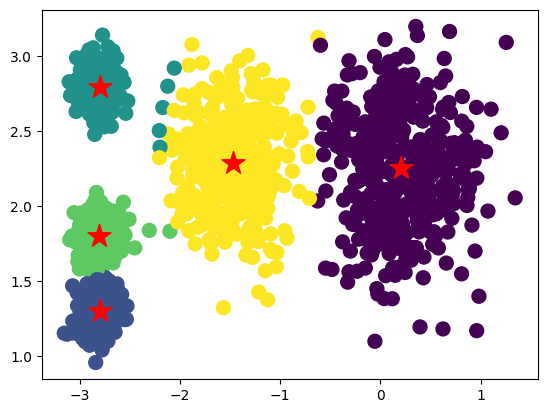

In [50]:
plt.scatter(X2[:, 0], X2[:, 1], s=100, c=labels)
plt.scatter(centers[: , 0], centers[: , 1], s=300, marker='*', c='red')

### sklearn

In [60]:
cols = ['gender', 'age', 'annual_income', 'spending_score']
idx = [2, 3]
X = X_train[:, idx].copy()

In [67]:
n = 5
kmeans = KMeans(n_clusters=n, init='k-means++', n_init=3, max_iter=300, 
                tol=0.0001, random_state=111, algorithm='elkan')

kmeans.fit(X)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
labels.shape, centroids.shape

((160,), (5, 2))

In [68]:
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), 
                     np.arange(y_min, y_max, h))

Xm = kmeans.predict(np.c_[xx.ravel(), yy.ravel()]) 
Xm = Xm.reshape(xx.shape)

Text(0, 0.5, 'spending_score')

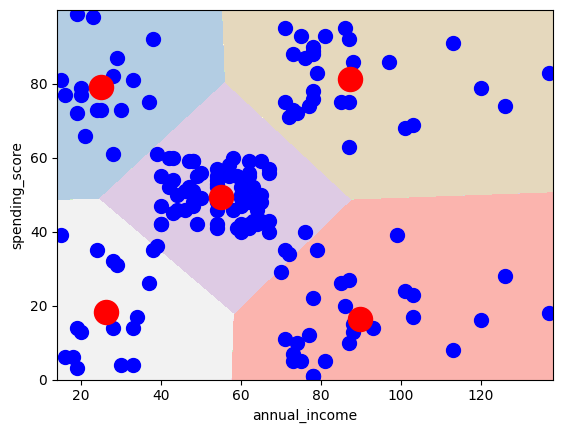

In [69]:
plt.contourf(xx, yy, Xm, cmap=plt.cm.Pastel1)

plt.scatter(X[:, 0], X[:, 1], s=100, c='blue')
plt.scatter(centroids[: , 0], centroids[: , 1], s=300, c='red')

plt.xlabel(cols[idx[0]])
plt.ylabel(cols[idx[1]])

## **🔸 Elbow & Silhouette**

### Elbow

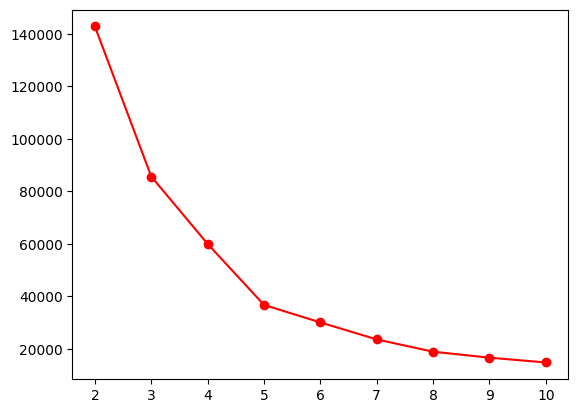

In [85]:
inertia = []
for n in range(2 , 11):
    kmeans = KMeans(n_clusters=n, init='k-means++', n_init=10, max_iter=300, 
                    tol=0.0001, random_state=111 , algorithm='elkan')
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.plot(range(2 , 11), inertia, 'r-o')

### Silhouette score

In [86]:
silhouette_score(X, labels)

0.5568339240386461

### Silhouette diagram

C:\Users\PC\anaconda3\envs\howsam-python-ai\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


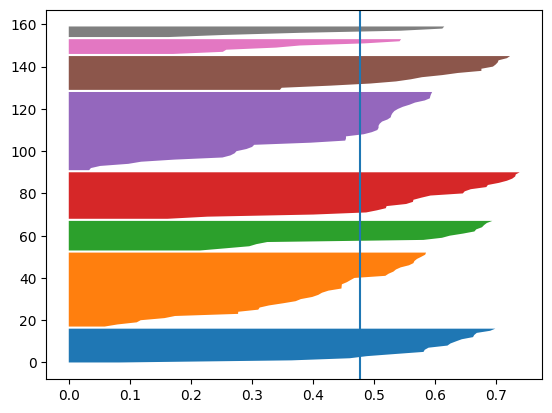

In [96]:
k = 8
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10).fit(X)
labels = kmeans.labels_

silhouette_coefficients = silhouette_samples(X, labels)
silhouette_coefficients.shape

pad = 0
for ki in range(k):
    coeffi = silhouette_coefficients[labels == ki]
    coeffi.sort()
    # print(coeffi.shape)
    plt.fill_betweenx(np.arange(pad, pad+len(coeffi)), coeffi)
    
    pad += len(coeffi)

plt.axvline(silhouette_score(X, labels))

## **🔸 Hierarchical Clustering**

### Example 1

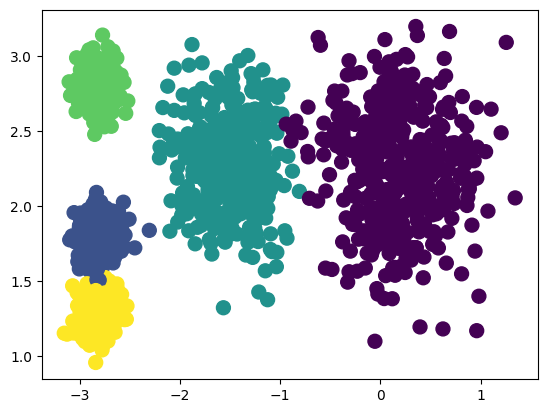

In [66]:
agg = AgglomerativeClustering(n_clusters=5, linkage='ward')
agg.fit(X2)

labels = agg.labels_
# print(np.unique(labels))

plt.scatter(X2[:, 0], X2[:, 1], s=100, c=labels);

### Example 2

In [67]:
cols = ['gender', 'age', 'annual_income', 'spending_score']
idx = [2, 3]
X = X_train[:, idx].copy()

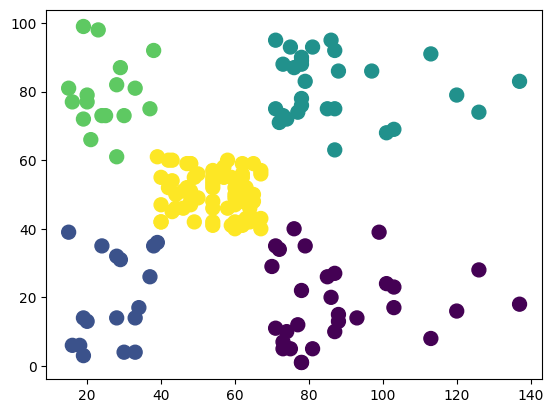

In [71]:
agg = AgglomerativeClustering(n_clusters=5, linkage='complete')
agg.fit(X)

labels = agg.labels_

plt.scatter(X[:, 0], X[:, 1], s=100, c=labels);

### Example 3

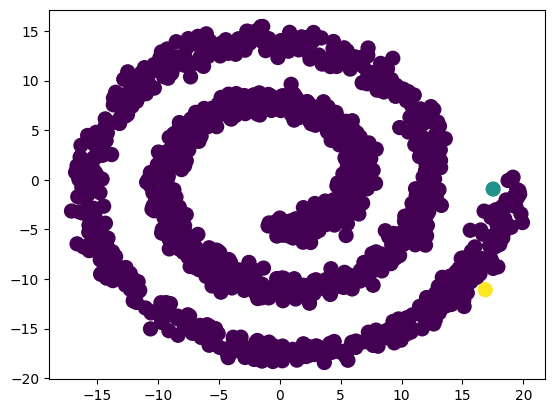

In [81]:
agg = AgglomerativeClustering(n_clusters=None, linkage='single', distance_threshold=1.4)
agg.fit(X3)

labels = agg.labels_
# print(np.unique(labels))

plt.scatter(X3[:, 0], X3[:, 1], s=100, c=labels);

### Dendrogram

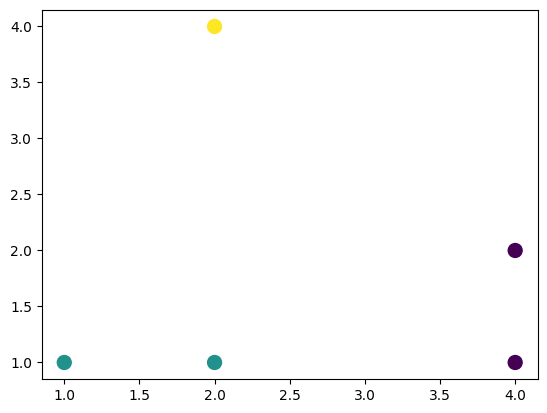

In [82]:
agg = AgglomerativeClustering(n_clusters=3, linkage='ward', compute_distances=True)
agg.fit(X4)

labels = agg.labels_

plt.scatter(X4[:, 0], X4[:, 1], s=100, c=labels);

In [84]:
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

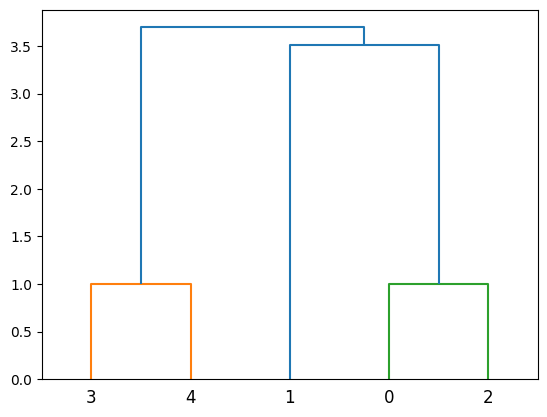

In [85]:
plot_dendrogram(agg, truncate_mode="level", p=3)

In [86]:
agg.distances_

array([1.        , 1.        , 3.51188458, 3.6968455 ])